### 1. Problem Statement & Data Collection

#### We'll use Logistic Regression for customer churn prediction, a real-world problem where businesses want to predict if a customer is likely to stop using their services.

#### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [4]:
data = pd.read_csv('Telecom_customer_churn.csv')

#### Data Inspection

In [6]:
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

### 2: Exploratory Data Analysis (EDA)

#### Display dataset info and summary

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
print(data.describe(include='all'))

        customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     7590-VHVEG   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count         

#### Check how many unique values are there in the variables

In [17]:
print(data.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


#### Check if there is any duplicate value in the dataset

In [20]:
print(data.duplicated().sum())

0


#### Check if there is any missing value in the dataset

In [23]:
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


#### Value counts of target variable

In [26]:
print(f'Churn Value Counts : {data['Churn'].value_counts()}')

Churn Value Counts : Churn
No     5174
Yes    1869
Name: count, dtype: int64


#### Visualizing distribution of churn

C:\Users\shubh\AppData\Local\Temp\ipykernel_19424\856382781.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='coolwarm')


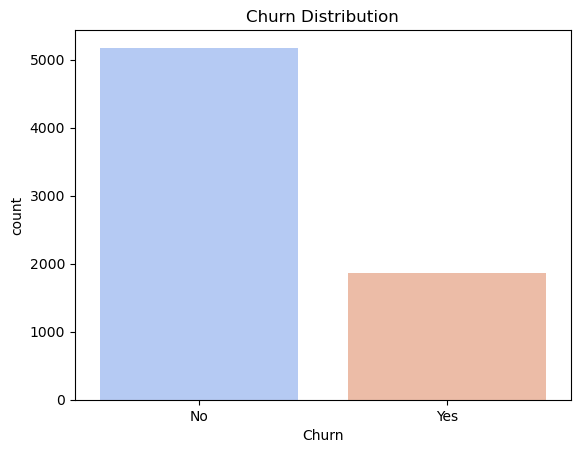

In [31]:
sns.countplot(x='Churn', data=data, palette='coolwarm')
plt.title("Churn Distribution")
plt.show()

### 3: Data Preprocessing

#### Handling Missing Values

In [37]:
# Filling missing TotalCharges with median
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_19424\4151069620.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


#### Encoding Categorical Variables

In [43]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric

categorical_cols = data.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical features
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

#### Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

### 4: Splitting Data

In [53]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Churn'])
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(f'Training data shape : {X_train.shape}, Test Data Shape : {X_test.shape}')

Training data shape : (5634, 20), Test Data Shape : (1409, 20)


### 5: Building Logistic Regression Model

In [56]:
from sklearn.linear_model import LogisticRegression

#### Initialize and train logistic regression model

In [63]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

#### Predictions

In [65]:
y_pred = model.predict(X_test)

### 6: Model Evaluation

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Evaluate the model

In [73]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.815471965933286


#### Display classification report

In [76]:
print('\nClassification Report : ', classification_report(y_test, y_pred))


Classification Report :                precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



#### Confusion Matrix

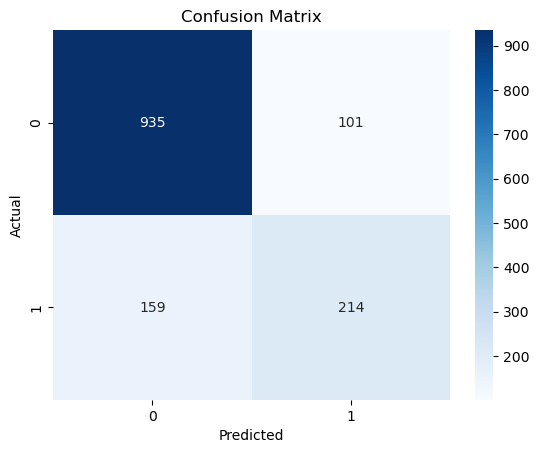

In [79]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Final Predictions & Insights

- The Logistic Regression model predicts whether a customer will churn based on past data.

- This model provides a baseline performance without optimization.

- Businesses can use these predictions to identify customers at risk of churn and take action.